# Digital images as arrays of numbers

Digital images are composed of pixels. In a grayscale image, each pixel is coded by 1 byte or 8 bits. However, in a color image (RGB image), each pixel is coded by 3 bytes or 24 bits as the stack of 3 color channels (Red, Green and Blue). Each color channel (R/G/B in color image or black/while in grayscale image) has integer values from 0 to 255 (in total, 256 values = 2^8).

**Exercise 1.1**
1.   Open a black & white image file (checkerboard_bw.png), using the function `cv2.imread()`. Next, you can visualize the image using `plt.imshow()`, then you `print()` this image to see the image structure as an array.  
2.   Continue working with "checkerboard_bw.png": Change the 4 middle pixel values from Black (0) to White (255) given that the image size is 18 x 18 pixels. Visualize the new image to see if you are successful.






Saving checkerboard_bw.png to checkerboard_bw.png


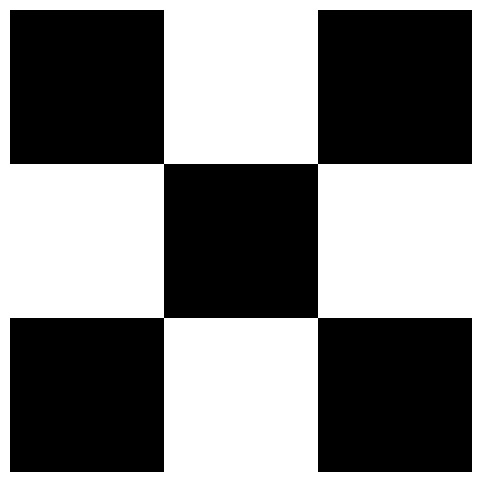

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  

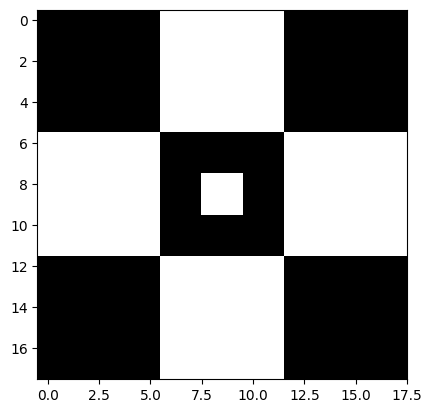

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image file to Colab
uploaded = files.upload()
bw = cv2.imread("checkerboard_bw.png")

# Visualize the image
plt.figure(figsize=(6,6))
plt.imshow(bw)
plt.axis("off")
plt.show()

# Image structure
print(bw)

# Change the 4 middle pixel values from Black (0) to White (255)
bw[8,8] = 255
bw[9,8] = 255
bw[9,9] = 255
bw[8,9] = 255

plt.imshow(bw)

**Exercise 1.2**
1.   Open a color image file (checkerboard_color.png), check the image structure as an array and visualize it. Is it different from the original image?  
2.   OpenCV uses the BGR format as default, while our original image is RGB. Therefore, we need to convert the format to see the right color.






Saving checkerboard_color.png to checkerboard_color.png
[[[ 51 142 209]
  [ 51 142 209]
  [ 51 142 209]
  ...
  [228 238 248]
  [228 238 248]
  [228 238 248]]

 [[ 51 142 209]
  [ 51 142 209]
  [ 51 142 209]
  ...
  [228 238 248]
  [228 238 248]
  [228 238 248]]

 [[ 51 142 209]
  [ 51 142 209]
  [ 51 142 209]
  ...
  [228 238 248]
  [228 238 248]
  [228 238 248]]

 ...

 [[228 238 248]
  [228 238 248]
  [228 238 248]
  ...
  [ 51 142 209]
  [ 51 142 209]
  [ 51 142 209]]

 [[228 238 248]
  [228 238 248]
  [228 238 248]
  ...
  [ 51 142 209]
  [ 51 142 209]
  [ 51 142 209]]

 [[228 238 248]
  [228 238 248]
  [228 238 248]
  ...
  [ 51 142 209]
  [ 51 142 209]
  [ 51 142 209]]]


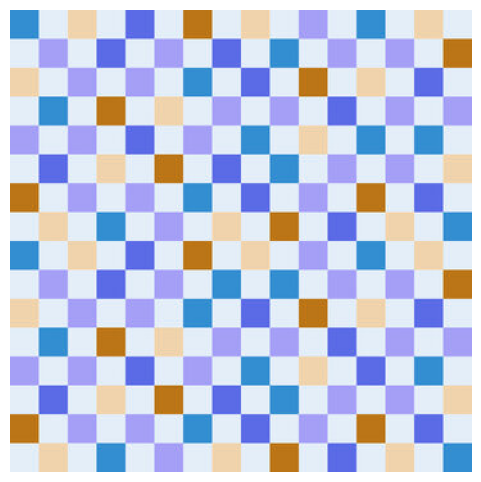

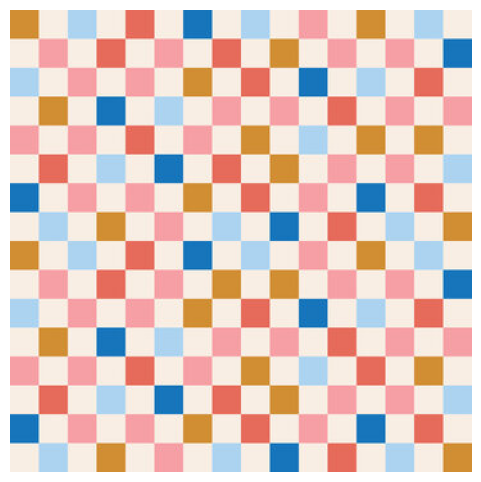

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload manually in Colab
uploaded = files.upload()
c = cv2.imread("checkerboard_color.png")

# Image structure
print(c)

# Visualization
plt.figure(figsize=(6,6))
plt.imshow(c)
plt.axis("off")
plt.show()

# Convert BGR (OpenCV default) to RGB
c_rgb = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(c_rgb)
plt.axis("off")
plt.show()

Conversion is often used to reduce the complexity of the image (dimension reduction) when color images are converted to grayscale or binary images (only black and white, no gray). In this case, it helps to minimize the computer power required and some algorithms only work on grayscale/binary images.

# Image processing is a procedure including various steps

When I mentioned "steps" in image processing, it also means "algorithms/techniques" applied to a digital image to improve its quality, prepare it for further analysis and extract useful information. A typical process treats the image as a two-dimensional signal or a matrix (conversion from a color to black-white image) and performs various operations like noise reduction, contrast adjustments, segmentation, and feature detection. In our class today, you will learn some important techniques via a mini project: Nuclei counting example in histology image.

We an image of stained animal tissue, where the dark pink/purple dots are nuclei. We have to quantify the number of nuclei in the image. Our plan to do this task:

*   STEP 1: Load the image
*   STEP 2 (preprocessing): Reduce dimensions of the image (convert color to grayscale) and reduce noise (Gaussian blur)
*   STEP 3 (main analysis): Thresholding for object detection (object here is the nucleus)
*   STEP 4 (postprocessing): Invert the binary image (result of the previous step) to make it easier to see
*   STEP 5 (postprocessing): Morphological operations to remove small noises
*   STEP 6 (further analysis): Count nuclei (find connected components in the processed image)
*   STEP 7: Visualize segmentation to double-check the results










First, let's revisit some codes from the previous part of our class.

**Exercise 2 (STEP 1)**

 Open the image file ("cell_noise.png"). Visualize it (remember to convert BGR-RGB for plotting).









Saving cell_noise.png to cell_noise.png


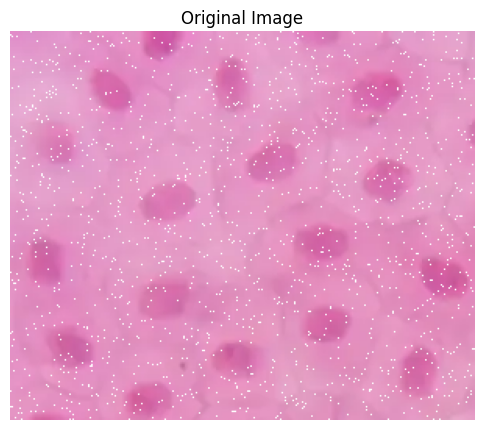

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ---- STEP 1: Load the image ----
# Upload manually in Colab
uploaded = files.upload()
img = cv2.imread("cell_noise.png")

# Convert BGR (OpenCV default) to RGB for plotting
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


**Exercise 3 (STEP 2)**

1.   Convert the image to grayscale.
2.   As the image contains salt-and-pepper noise, apply median blur (kernel size = 3x3), a method suitable to reduce this kind of noise.








Image blurring (also called smoothing or filtering) helps to reduce noise, thus we can get better information about the main structures in the image. To perform image blurring, we transform the original image (the original array) by scanning a filter or kernel (also an array) throughout the original image. This process is called convolution. Convolution and filtering are quickly explained in this 5-minute YouTube video: https://www.youtube.com/watch?v=6v8dNtknOSM.     


Let's try to write a median blurring algorithm. Hints: The algorithm involves scanning a filter (kernel) over the image and transforming each pixel. To accomplish this:
1.   Determine the image dimensions (height and width).
2.   Create an empty image (array) to store the output.
3.   Iterate through each pixel, excluding the borders, and apply the transformation (in our case, assign the median value).





    

    

Plan B: If you're short on time, don't worry. You can simply try the built-in function from OpenCV, `cv2.medianBlur()`.

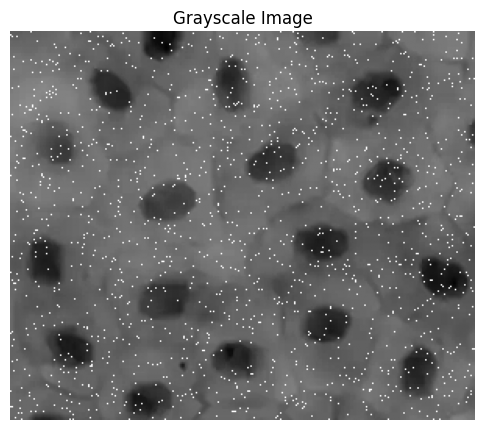

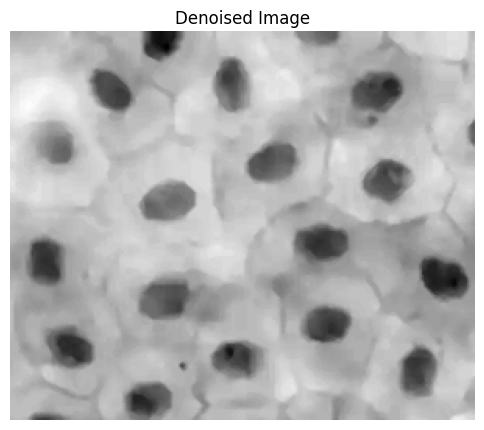

In [ ]:
# ---- STEP 2: Convert to grayscale ----
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()

# Apply median blur to reduce noise using the build-in function
blurred = cv2.medianBlur(gray, 3)

plt.figure(figsize=(6,6))
plt.title("Denoised Image")
plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()



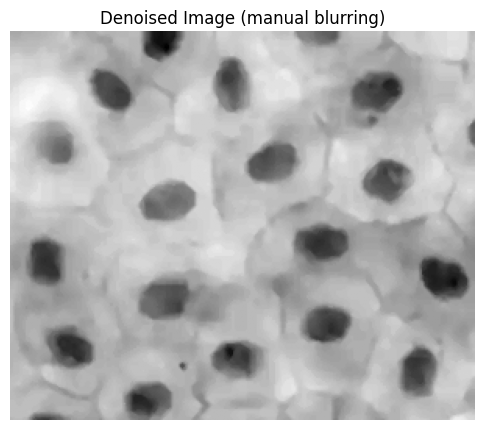

In [ ]:
# Manual blurring
import cv2
import numpy as np

def simple_median_blur_gray(image):
    """
    Apply a median blur with a 3x3 window to a grayscale image.
    """
    # Get image height and width
    h, w = image.shape

    # Create an empty image to store the result
    result = np.zeros_like(image)

    # Loop over each pixel (skip the border pixels)
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            # Extract the 3x3 neighborhood
            window = image[y-1:y+2, x-1:x+2]
            # Find the median value in this 3x3 block
            median_value = np.median(window)
            # Assign the median value to the result image
            result[y, x] = median_value

    return result

# Apply our simple median blur
manual_blurred = simple_median_blur_gray(gray)

plt.figure(figsize=(6,6))
plt.title("Denoised Image (manual blurring)")
plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()


**Exercise 4 (STEP 3)**

1.   Perform thresholding using a random value.
2.   Perform thresholding using a specific value.








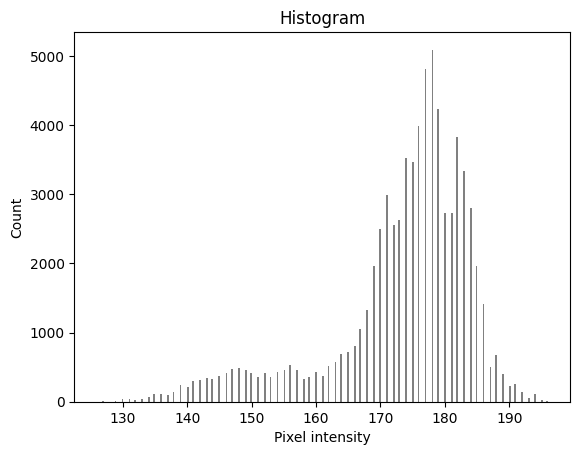

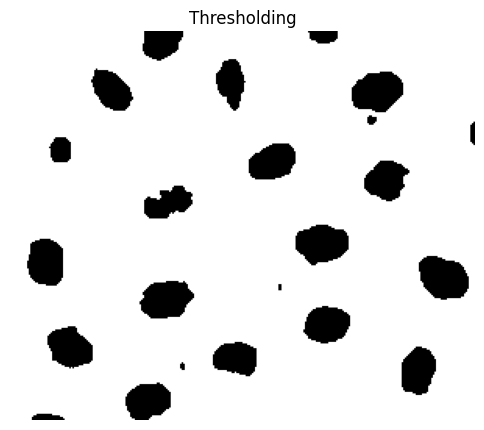

In [ ]:
# ---- STEP 3: Thresholding ----
# Histogram to determine the threshold
plt.hist(blurred.ravel(), bins=256, color='gray')
plt.title("Histogram")
plt.xlabel("Pixel intensity"); plt.ylabel("Count")
plt.show()

# Thresholding
_, thresh = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6,6))
plt.title("Thresholding")
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.show()

**Exercise 5 (STEP 4)**

Invert the image from STEP 3 (now nuclei should be white)








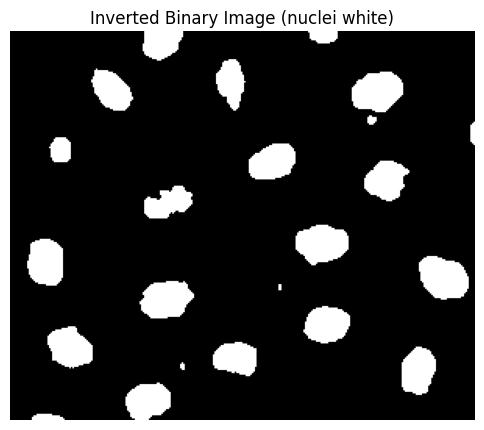

In [ ]:
# ---- STEP 4: Invert (nuclei should be white) ----
binary = cv2.bitwise_not(thresh)

plt.figure(figsize=(6,6))
plt.title("Inverted Binary Image (nuclei white)")
plt.imshow(binary, cmap='gray')
plt.axis("off")
plt.show()



Further steps (depending on remaining time):

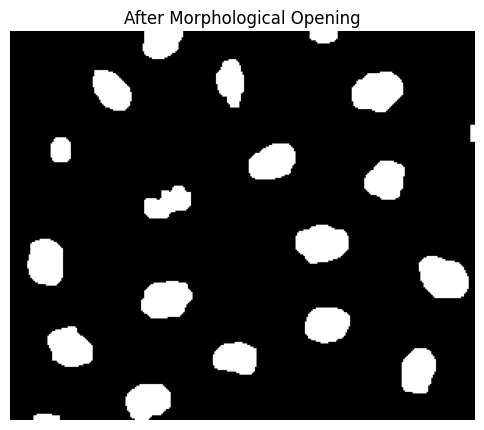

In [ ]:
# ---- STEP 5: Morphological operations ----
# Remove small noise
kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

plt.figure(figsize=(6,6))
plt.title("After Morphological Opening")
plt.imshow(opened, cmap='gray')
plt.axis("off")
plt.show()


In [ ]:
# ---- STEP 6: Find connected components (count nuclei) ----
num_labels, labels = cv2.connectedComponents(opened)

print("Number of nuclei detected:", num_labels - 1)  # subtract background

Number of nuclei detected: 20


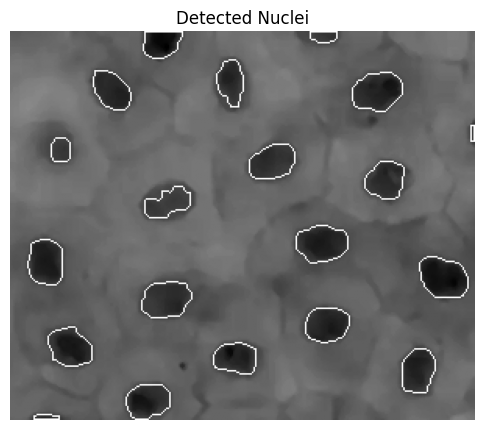

In [ ]:
# ---- STEP 7: Visualize segmentation ----
output = blurred.copy()
# Assign colors to each nucleus
for label in range(1, num_labels):  # skip background
    mask = (labels == label).astype("uint8") * 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(output, contours, -1, (255,0,0), 1)  # blue outlines

plt.figure(figsize=(6,6))
plt.title("Detected Nuclei")
plt.imshow(output, cmap='gray')
plt.axis("off")
plt.show()